# **EMPLOYEE ATTRITION**

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
df = pd.read_csv('Attrition data.csv')
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [49]:
df.shape

(4410, 29)

Here we can see that there are 4410 rows in the dataset, which means that there is data of 4410 employees available in the given dataset.


In [50]:
df.columns

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')

In [51]:
print(df.isnull().sum())

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64


# Overall Attrition Rate

In [52]:
attrition_data = df.groupby('Attrition')['EmployeeID'].count().reset_index()
attrition_data

,Attrition,EmployeeID
0,No,3699
1,Yes,711


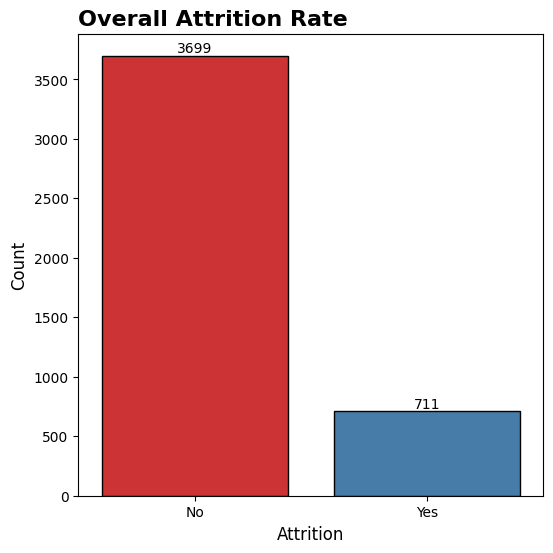

In [53]:
plt.figure(figsize=(6, 6))
plot = sns.countplot(x='Attrition', data=df, palette='Set1', hue = 'Attrition', edgecolor = 'k', alpha = 1)
plot.bar_label(plot.containers[0])
plot.bar_label(plot.containers[1])
plt.title('Overall Attrition Rate',weight = 'bold', color = 'k', fontsize = 16, loc = 'left')
plt.xlabel('Attrition', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

#### Observation
As per the above data, we can see that a total of 711 out of 4410 employees have quit the job due to various reasons. Let us now try to deduce the possible reasons for the attrition of those 711 employees.

# Attrition Rate by Age

In [54]:
age = df.groupby('Attrition')['Age'].value_counts().fillna(0)['Yes'].reset_index()
age

,Age,count
0,29,54
1,31,54
2,28,42
3,26,36
4,33,36
5,32,33
6,35,30
7,30,27
8,34,27
9,24,21


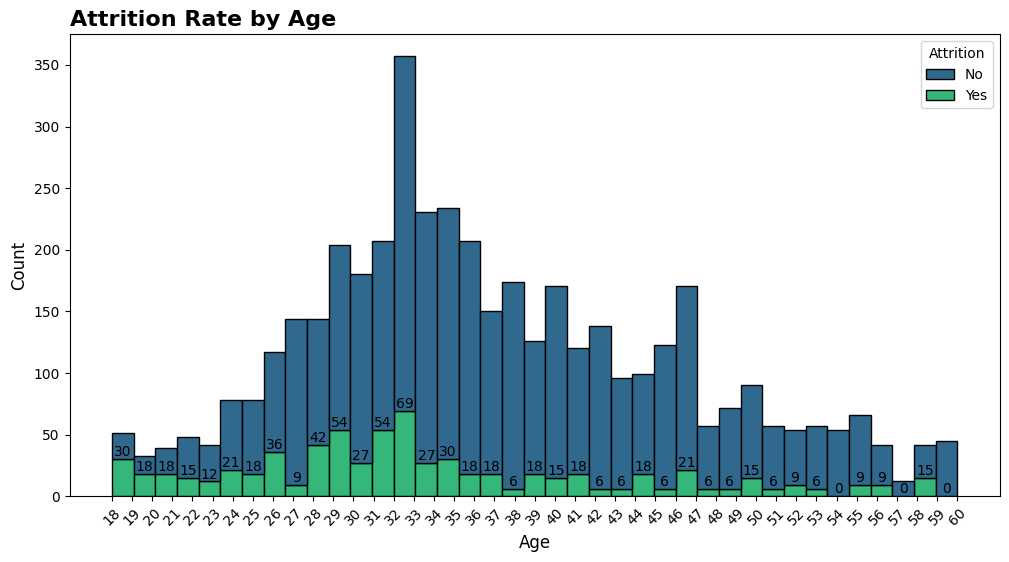

In [55]:
plt.figure(figsize=(12, 6))
plot = sns.histplot(data=df, x='Age', hue='Attrition',multiple = 'stack', bins = 39, palette='viridis', edgecolor = 'k', alpha = 1)
plot.bar_label(plot.containers[0])
plt.title('Attrition Rate by Age', weight = 'bold', color = 'k', fontsize = 16, loc = 'left')
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

all_ages = sorted(df['Age'].unique())
plt.xticks(all_ages, rotation=45)
plt.show()
plt.show()

#### Observation
We can see that the employees within the age range of 18-35 has a comparatively higher attrition rate. We can infer that the attrition rate is higher amongst the younger employees which might be due to dissatisfaction with growth opportunities. The younger employees typically tend to focus on enhancing and developing their skills while also trying to learn new skills. Higher attrition rates amongst young employees might indicate that the company is not providing them with a space where they can grow their skills and talent which is very helpful in buliding one's career. The company has to provide the employees with more challenging and interesting tasks and projects that would test the limits of the abilities of these employees where they can challenge themselves and also learn new skills.

# Attrition Rate by Gender

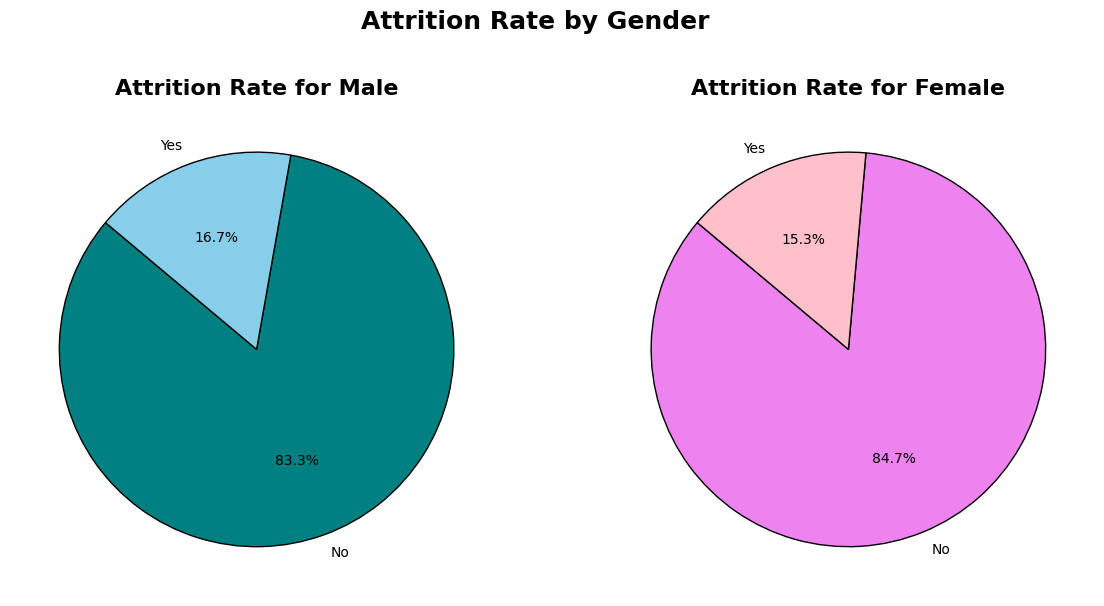

In [102]:
gender_attrition_counts = df.groupby(['Gender', 'Attrition']).size().unstack(fill_value=0)
gender_attrition_percentages = gender_attrition_counts.div(gender_attrition_counts.sum(axis=1), axis=0) * 100

# Extract the data for male and female
male_attrition = gender_attrition_percentages.loc['Male']
female_attrition = gender_attrition_percentages.loc['Female']

# Plot pie chart for male
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

ax[0].pie(male_attrition, labels=male_attrition.index, autopct='%1.1f%%', startangle=140, colors=['teal', 'skyblue'], wedgeprops={'width': 1, 'edgecolor' : 'k'})
ax[0].set_title('Attrition Rate for Male', fontsize=16, weight='bold')

# Plot pie chart for female
ax[1].pie(female_attrition, labels=female_attrition.index, autopct='%1.1f%%', startangle=140, colors=['violet', 'pink'], wedgeprops={'width': 1, 'edgecolor' : 'k'})
ax[1].set_title('Attrition Rate for Female', fontsize=16, weight='bold')

plt.suptitle('Attrition Rate by Gender', fontsize=18, weight='bold')
plt.show()


#### Observation
The attrition rate percentage of men and women is very close to each other where the attrition percentage of male employees is 16.7% and the attrition rate of female employees is at 15.3%. This observation shows that there is no clear hike in the attrition rate of one gender which and therefore we can come at the conclusion that the attrition rates isn't depended or related to gender issues.

# Attrition Rate by Department

In [57]:
dept_attrition = df.groupby('Department')['Attrition'].value_counts().reset_index()
dept_attrition

,Department,Attrition,count
0,Human Resources,0,132
1,Human Resources,1,57
2,Research & Development,0,2430
3,Research & Development,1,453
4,Sales,0,1137
5,Sales,1,201


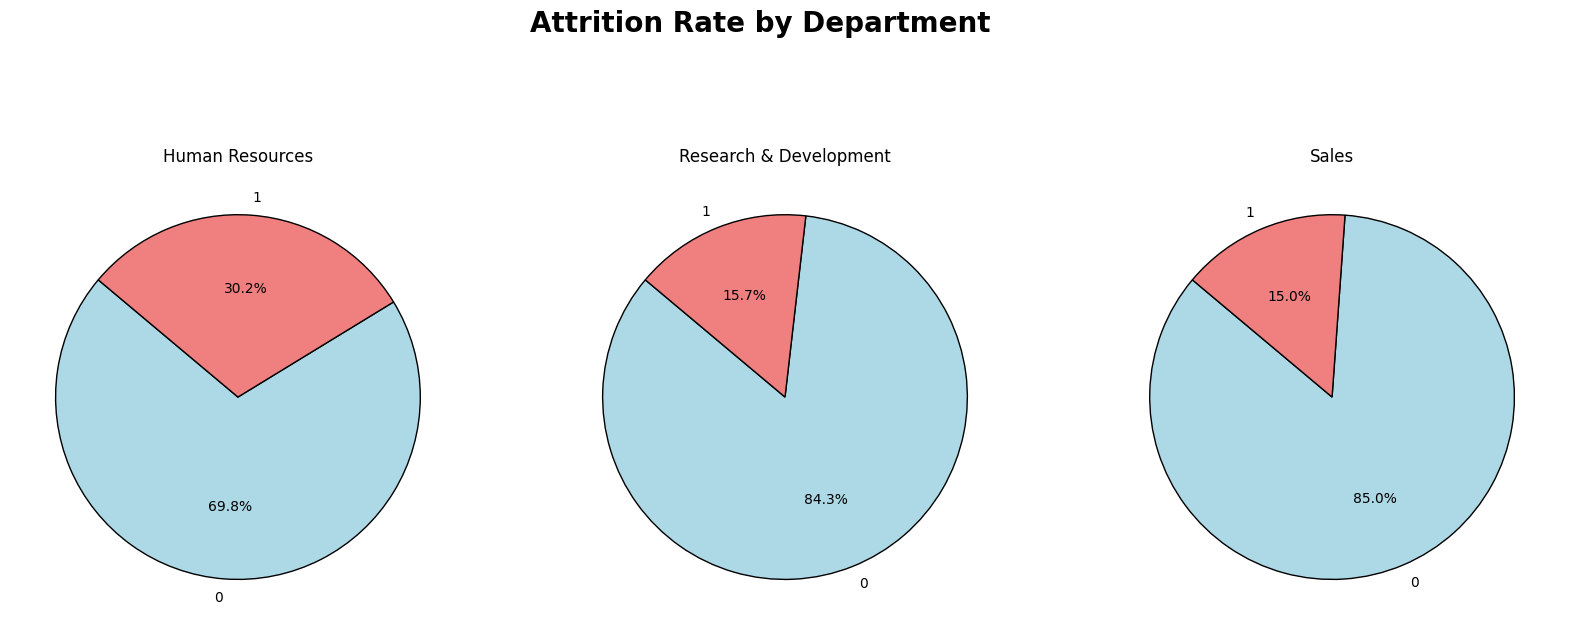

In [58]:
department_groups = df.groupby(['Department', 'Attrition']).size().unstack(fill_value=0)

fig, axes = plt.subplots(1, len(department_groups), figsize=(20, 8))

for i, department in enumerate(department_groups.index):
    attrition_counts = department_groups.loc[department]
    labels = attrition_counts.index
    sizes = attrition_counts.values
    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'], wedgeprops={'width': 1, 'edgecolor' : 'k'})
    axes[i].set_title(department)

plt.suptitle('Attrition Rate by Department', fontsize=20, weight='bold')
plt.show()

#### Observation
In the above chart we can see that the attrition rate is highest within the Human Resources Department at 30.2% which is around the combined rate of other two departments. This could be because of Human Resources Department having issues within itself such as higher stress, lack of career advancement, or inadequate management, as compared to the other two departments.

# Attrition Rate by Job Role

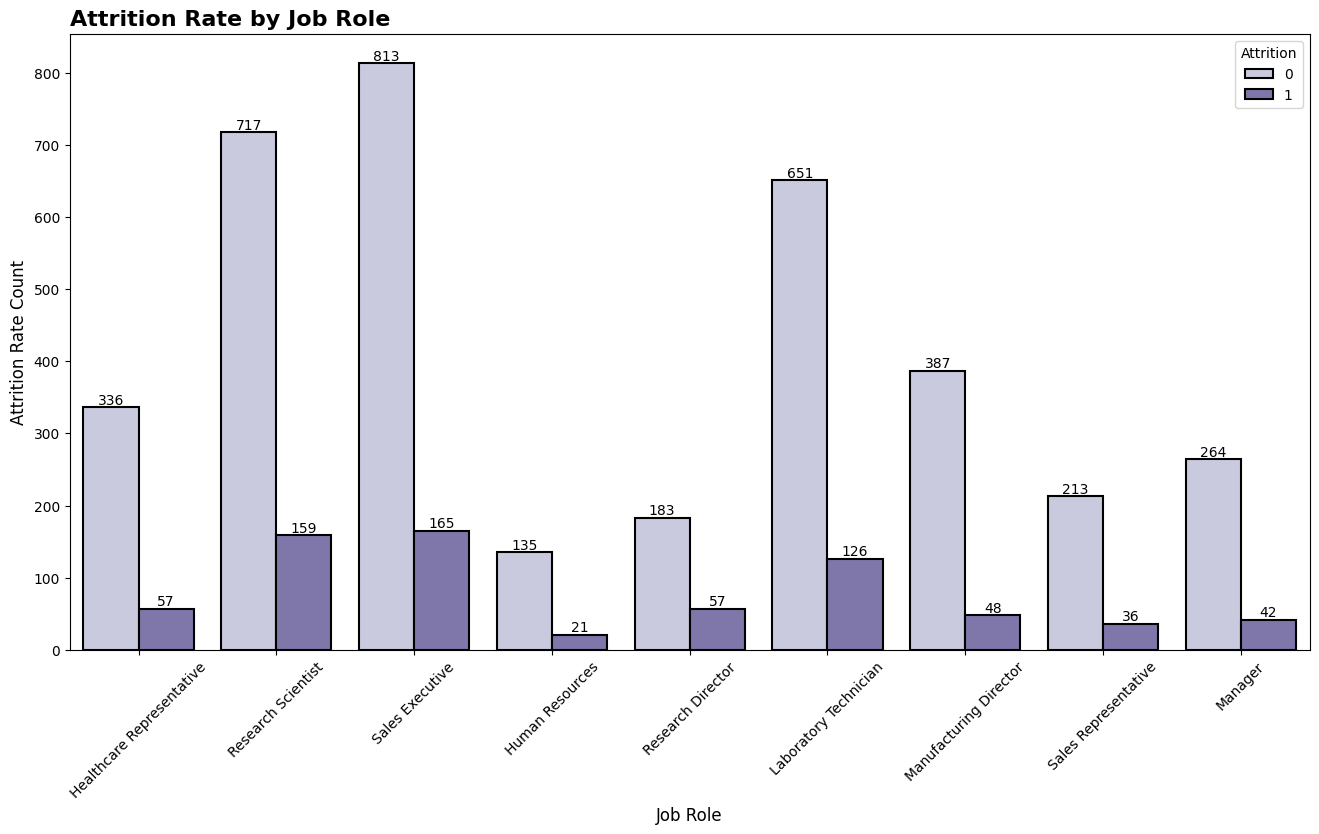

In [65]:
plt.figure(figsize=(16, 8))
plot = sns.countplot(x = 'JobRole', hue = 'Attrition', data = df, edgecolor = 'k', linewidth = 1.5, palette = 'Purples', alpha = 1, legend = True)
plot.bar_label(plot.containers[0])
plot.bar_label(plot.containers[1])
plt.title('Attrition Rate by Job Role', fontsize=16, weight='bold', color='k', loc = 'left')
plt.xlabel('Job Role',fontsize = 12)
plt.ylabel('Attrition Rate Count', fontsize = 12)
job_roles = sorted(df['JobRole'].unique())
plt.xticks(job_roles, rotation=45)
plt.show()

#### Observation
We have plotted a countplot that shows that attrition rate by different job roles of the employees across all departments. We can see that Sales Executive,  Research Scientist, Laboratory technician and Research Director has higher attrition rates than other Job Roles as compared to the total employees working within the same job role. As we inferred before from Attrition rate by Department chart, the hike in attrition rates from these job roles could mean that the employees working in these roles are facing high stress, lack of career advancements, incapability of skill enhancements, inadequate management etc. 

# Attrition Rate by Job Satisfaction

In [60]:
job_satisfaction = df.groupby('JobSatisfaction')['Attrition'].value_counts().unstack().reset_index()
job_satisfaction

Attrition,JobSatisfaction,0,1
0,1.0,663,197
1,2.0,702,138
2,3.0,1104,219
3,4.0,1211,156


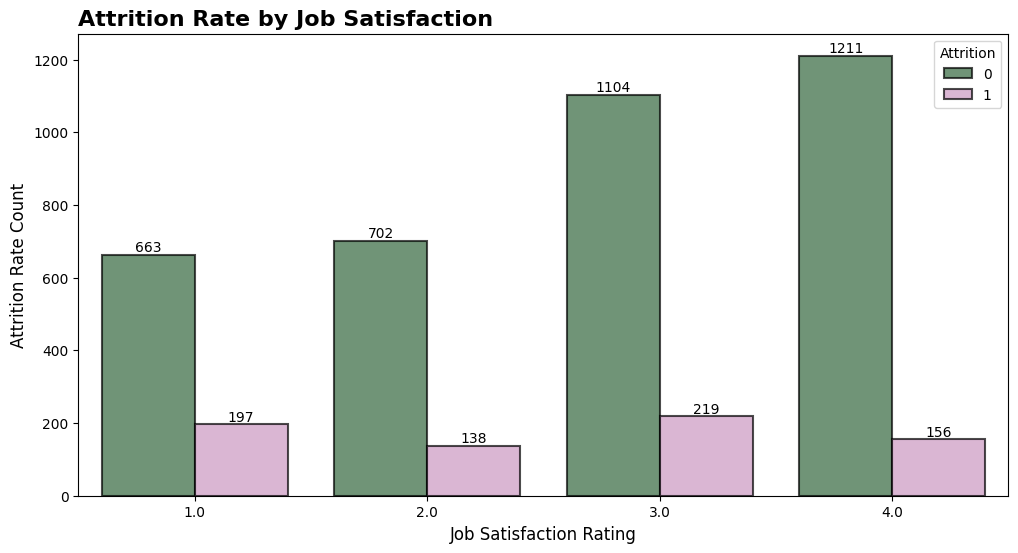

In [61]:
plt.figure(figsize=(12,6))
plot = sns.countplot(x = 'JobSatisfaction', hue = 'Attrition', data = df, edgecolor = 'k', linewidth = 1.5, palette = 'cubehelix', alpha = 0.7)
plot.bar_label(plot.containers[0])
plot.bar_label(plot.containers[1])
plt.title('Attrition Rate by Job Satisfaction', fontsize=16, weight='bold', color='k', loc = 'left')
plt.xlabel('Job Satisfaction Rating',fontsize = 12)
plt.ylabel('Attrition Rate Count', fontsize = 12)
plt.show()

#### Observation
Here we can see that the employees who have given 1 as the rating for Job Satisfaction has had more attrition rates as compared to the total number of employees who have rated it. We can see that a total of 860 employees have rated their Job Satisfaction rating as 1, and a total of 840 employees have rated it as 2. This is a serious concern for the company because Job Satisfaction is a very important part of doing a job and many people find Job Satisfaction more important than their salaries. Having job satisfaction means having a good mental health and peace in life.  So the company should try reducing this problem of theirs by trying not to put too much pressure and stress on the employees and also provide the employees with better career development paths, better management, and also trying to make their job more flexible by gicing the option of working remotely, trying not to make them work overtime. Also, ensure that compensation and benefits are competitive within the industry. Offer perks such as health insurance, bonuses, and career development opportunities.

# Attrition Rate by Environment Satisfaction

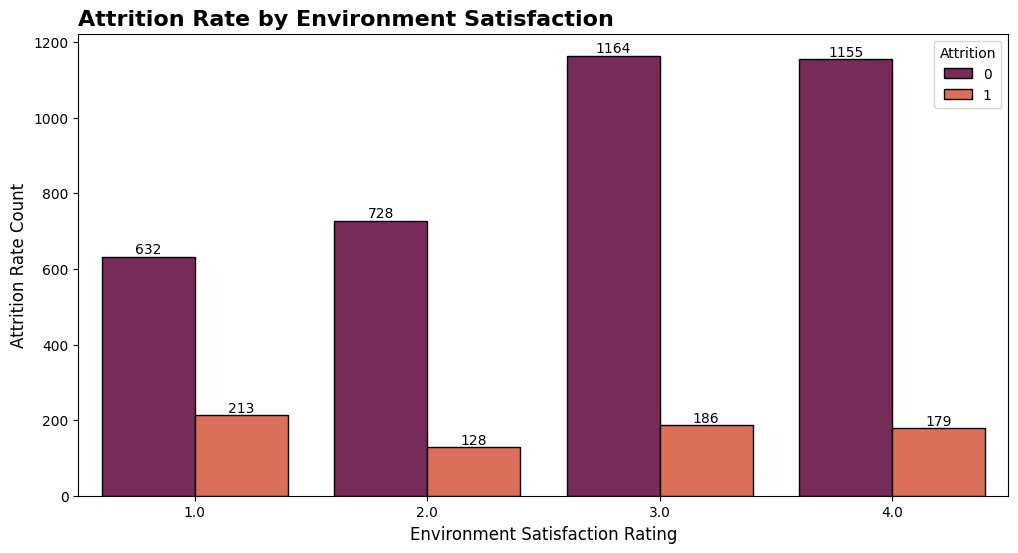

In [62]:
plt.figure(figsize=(12,6))
plot = sns.countplot(x = 'EnvironmentSatisfaction', hue = 'Attrition', data = df, edgecolor = 'k', palette = 'rocket', alpha = 1)
plot.bar_label(plot.containers[0])
plot.bar_label(plot.containers[1])
plt.title('Attrition Rate by Environment Satisfaction', fontsize=16, weight='bold', color='k', loc = 'left')
plt.xlabel('Environment Satisfaction Rating',fontsize = 12)
plt.ylabel('Attrition Rate Count', fontsize = 12)
plt.show()

#### Observation
We can see that there are many employees who have given lower rating for Environment Satisfaction and a lot of them have resigned from the company as well. Environment Satisfaction is as important as Job Satisfaction because it enables the employees to have a better work-life balance and also have better mental health. The company should focus on improving the physical and cultural work environment and also ensure that the workplace is safe, inclusive, and supportive of employee well-being.

# Attrition Rate by Salary Hike Percentage

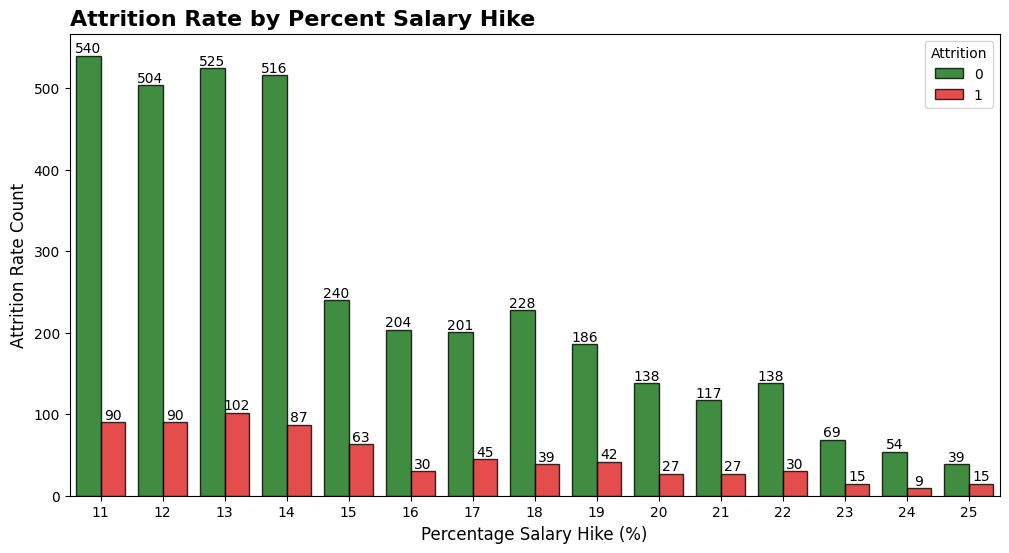

In [63]:
plt.figure(figsize=(12,6))
colors = ["green", "red"]
plot = sns.countplot(x = 'PercentSalaryHike', hue = 'Attrition', data = df, edgecolor = 'k', palette = colors, alpha = 0.8)
plot.bar_label(plot.containers[0])
plot.bar_label(plot.containers[1])
plt.title('Attrition Rate by Percent Salary Hike', fontsize=16, weight='bold', color='k', loc = 'left')
plt.xlabel('Percentage Salary Hike (%)', fontsize = 12)
plt.ylabel('Attrition Rate Count', fontsize = 12)
plt.show()

#### Observation
We can observer that the majority of the employees have the lower than 15% Salary Hike and a lot of employees amongst them have resigned as well. The company should focus more on providing the employees with higher salary hikes annually or after every few years based on their performance. They should also give promotion to the deserving candidates more than they do in general.